# Fine-tuning a Sequence Classification Model Exam

In this exam, you will be tasked with performing dataset preprocessing and fine-tuning a model for sequence classification. Complete each step carefully according to the instructions provided.

### Model and Dataset Information

For this task, you will be working with the following:

- **Model Checkpoint**: Use the pre-trained model checkpoint `aubmindlab/bert-base-arabertv02` for both the model and tokenizer.
- **Dataset**: You will be using the `CUTD/sanad_df` dataset. Ensure to load and preprocess the dataset correctly for training and evaluation.

**Note:**
- Any additional steps or methods you include that improve or enhance the results will be rewarded with bonus points if they are justified.
- The steps outlined here are suggestions. You are free to implement alternative methods or approaches to achieve the task, as long as you explain the reasoning and the process at the bottom of the notebook.
- You can use either TensorFlow or PyTorch for this task. If you prefer TensorFlow, feel free to use it when working with Hugging Face Transformers.
- The number of data samples you choose to work with is flexible. However, if you select a very low number of samples and the training time is too short, this could affect the evaluation of your work.

## Step 1: Load the Dataset

Load the dataset and split it into training and test sets. Use 20% of the data for testing.

In [ ]:
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 require

In [ ]:
from transformers import pipeline
from datasets import load_dataset
from sklearn.model_selection import train_test_split

In [ ]:
dataset = load_dataset('CUTD/sanad_df')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


sanad_df.csv:   0%|          | 0.00/50.3M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/15000 [00:00<?, ? examples/s]

In [ ]:
dataset.set_format('pandas')

In [ ]:
train_data, test_data = train_test_split(dataset['train'], test_size=0.2, random_state=42)

### EDA

In [ ]:
train_data['text'][0]

'ارتفع مؤشر سوق الإمارات المالي الصادر عن هيئة الأوراق المالية والسلع خلال جلسة تداول أمس بنسبة 19 .0% ليغلق على مستوى 55 .2،633 نقطة وشهدت القيمة السوقية ارتفاعاً بقيمة 71 .0 مليار درهم لتصل إلى 38 .382 مليار درهم، وقد تم تداول ما يقارب 66 .0 مليار سهم بقيمة إجمالية بلغت 88 .0 مليار درهم من خلال 11،766 صفقة . وقد سجل مؤشر قطاع البنوك ارتفاعاً بنسبة 21 .1% تلاه مؤشر قطاع التأمين ارتفاعاً بنسبة 03 .0% تلاه مؤشر قطاع الخدمات انخفاضاً بنسبة 97 .0% تلاه مؤشر قطاع الصناعات ارتفاعاً بنسبة 39 .1% .وبلغ عدد الشركات التي تم تداول أسهمها 64 من أصل 131 شركة مدرجة في الأسواق المالية . وحققت أسعار أسهم 31 شركة ارتفاعا في حين انخفضت أسعار أسهم 23 شركة بينما لم يحدث أي تغير على أسعار أسهم باقي الشركات .وجاء سهم أرابتك القابضة في المركز الأول من حيث الشركات الأكثر نشاطاً حيث تم تداول ما قيمته 21 .0 مليار درهم موزعة على 10 .0 مليار سهم من خلال 2،129 صفقة . واحتل سهم سوق دبي المالي المرتبة الثانية بإجمالي تداول بلغ 62 .81 مليون درهم موزعة على 14 .58 مليون سهم من خلال 1،280 صفقة . وحقق سهم الجرافات البحر

In [ ]:
train_data['text'][1]

'أبوظبي علي أسعد: كشف راشد البلوشي الرئيس التنفيذي لسوق أبوظبي للأوراق المالية عن قيام السوق بالمفاوضات مع بنك أبوظبي الوطني حول الأسهم التي سيعتمدها صانع السوق، وقال في حديث ل"الخليج" إن حصول البنك على ترخيص من هيئة الأوراق المالية والسلع في الدولة بممارسة نشاط صانع السوق خطوة مهمة وفي الاتجاه الصحيح لتطوير أسواق المال في الدولة، وأضاف: يأتي ذلك على أعتاب ترقية أسواق المال كأسواق ناشئة ضمن مؤشرات مورجان ستانلي مطلع يوليو/تموز المقبل، مشيراً إلى أن متطلبات ممارسة نشاط صانع السوق المتعلقة بالأنظمة تم إصدارها من هيئة الأوراق المالية والسلع كنظام البيع على المكشوف ونظام إقراض واقتراض الأوراق المالية .وعلمت "الخليج" أن هناك جهات أخرى مالية تقدمت بطلب الترخيص لممارسة نشاط صانع السوق .وقال محمد مرتضى الدندش الرئيس التنفيذي لشركة الرمز للأوراق المالية إن شركة الرمز تقدمت بطلب لهيئة الأوراق المالية للحصول على ترخيص ممارسة صانع السوق، وهناك بنوك أخرى تقدمت بطلبات مماثلة لممارسة هذا النشاط الذي يعد أحد الأدوات لتطوير أسواق المال في الدولة، والمساهمة في تعزير سيولتها وجذب المزيد من الاستثمارات إل

In [ ]:
train_data['label'].value_counts()

label
Finance    5218
Culture    5171
Medical    1611
Name: count, dtype: int64

<Axes: xlabel='label'>

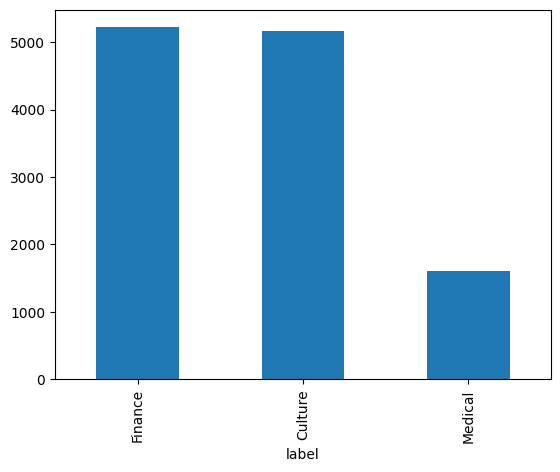

In [ ]:
train_data['label'].value_counts().plot(kind='bar')

In [ ]:
train_data.shape

(12000, 3)

In [ ]:
train_data.duplicated().sum()

0

In [ ]:
train_data.isna().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12000 non-null  int64 
 1   text        12000 non-null  object
 2   label       12000 non-null  object
dtypes: int64(1), object(2)
memory usage: 281.4+ KB


In [ ]:
train_data['text'] = train_data['text'].astype(str)

In [ ]:
train_data

,Unnamed: 0,text,label
0,9839,ارتفع مؤشر سوق الإمارات المالي الصادر عن هيئة ...,Finance
1,9680,أبوظبي علي أسعد: كشف راشد البلوشي الرئيس التنف...,Finance
2,7093,أنهت أسواق الأسهم المحلية تداولات فبراير على ا...,Finance
3,11293,أعاد بنك الخليج الأول شراء 32 ألف من أسهمه أمس...,Finance
4,820,حيث تتوفر شروط ثقافية صحية، ينتج هناك أدب رفيع...,Culture
...,...,...,...
11995,5191,شهدت ولاية نزوى في سلطنة عمان انطلاق فعاليات م...,Culture
11996,13418,عجمان: سيد زكي استقبل مركز راشد للسكري والأبحا...,Medical
11997,5390,إذا كانت ولادة المصطلح الجديد، تتعلق بدورة الز...,Culture
11998,860,أعلنت لجنة تحكيم جائزة المغرب للكتاب عن االفائ...,Culture


## Step 2: Clean Unnecessary Columns

Remove any columns from the dataset that are not needed for training.

In [ ]:
train_data.drop(columns=['Unnamed: 0'], inplace=True)
test_data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
##train_data = train_data.to_dict()
#test_data = test_data.to_dict()

## Step 3: Splitting the Dataset

Split the dataset into training and testing sets, ensuring that 20% of the data is used for testing.

## Step 4: Tokenizing the Data

Initialize a tokenizer for the model.

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("aubmindlab/bert-base-arabertv02")
tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv02")

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/381 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/825k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.64M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

## Step 5: Preprocessing the Text

Map the tokenization function to the dataset. Ensure the text data is processed using truncation to handle sequences that exceed the model's input size. Please do any further preprocessing.

**Bonus**: If you performed more comprehensive preprocessing, such as removing links, converting text to lowercase, or applying additional preprocessing techniques.

In [ ]:
def tokenize(data):
  return tokenizer(data['text'], padding=True, truncation=True)

In [ ]:
train_data_text = train_data['text'].astype(str).tolist()
test_data_text = test_data['text'].astype(str).tolist()


train_data_tokenized = tokenizer(train_data_text, truncation=True, padding=True, return_tensors='tf')
test_data_tokenized = tokenizer(test_data_text, truncation=True, padding=True, return_tensors='tf')

In [ ]:
train_data_tokenized

{'input_ids': <tf.Tensor: shape=(12000, 512), dtype=int32, numpy=
array([[    2,  6122,  4340, ...,     0,     0,     0],
       [    2,  2591,   485, ...,     0,     0,     0],
       [    2, 17831,  5970, ...,     0,     0,     0],
       ...,
       [    2,  1217,   678, ...,  5097,   464,     3],
       [    2,  2606,  1359, ...,     0,     0,     0],
       [    2,  6122,  4340, ...,     0,     0,     0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(12000, 512), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(12000, 512), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype

### Step 6: Label Encoding

Convert the categorical labels into numerical format using a label encoder if needed.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

all_labels = pd.concat([train_data['label'], test_data['label']])

le = LabelEncoder()
le.fit(all_labels)

train_data['label'] = le.transform(train_data['label'])
test_data['label'] = le.transform(test_data['label'])

### Step 7: Data Collation for Padding

Prepare the data for training by ensuring all sequences in a batch are padded to the same length. Use a data collator to handle dynamic padding.

### Step 8: Model Initialization

Initialize a sequence classification model using the BERT-based architecture. Set the the right amount of output labels.

In [ ]:
from transformers import TFAutoModelForSequenceClassification
import tensorflow as tf
model = TFAutoModelForSequenceClassification.from_pretrained("aubmindlab/bert-base-arabertv02", num_labels=3)


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy(),
)



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

model.fit(train_data_tokenized, train_labels, epochs=1)

## Step 9: Training Arguments

Define the training arguments, including parameters such as learning rate, batch size, number of epochs, and weight decay.

In [ ]:
from transformers import Trainer, TrainingArguments


args = TrainingArguments(num_train_epochs=1,
                         learning_rate=3e-5,
                         )

trainer = Trainer(model=model, args=args,
                  train_dataset=train_data_tokenized,
                  tokenizer=tokenizer)

trainer.train()


TypeError: TrainingArguments.__init__() missing 1 required positional argument: 'output_dir'

## Step 10: Trainer Initialization and Training

Set up the trainer with the model, training arguments, dataset, tokenizer, and data collator. Train the model using the dataset you processed earlier.

## Step 11: Inference

Once the model is trained, perform inference on a sample text to evaluate the model's prediction capabilities. Use the tokenizer to process the text, and then feed it into the model to get the predicted label.